In [99]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import statsmodels

In [3]:
df = pd.read_csv("./nobel_prize_data.csv")

In [4]:
df.shape

(962, 16)

In [5]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [6]:
df.describe()

,year
count,962.000000
mean,1971.816008
std,33.813537
min,1901.000000
25%,1948.000000
50%,1977.000000
75%,2001.000000
max,2020.000000


In [7]:
print(f"Duplicated Values : {df.duplicated().values.any()}")

Duplicated Values : False


In [8]:
print(f"NaN values : {df.isna().values.any()}")
print(f"Number of Nan Values : {df.isna().values.sum()}")
print(f"NaN Values : {df.isna().sum()}")

NaN values : True
Number of Nan Values : 1023
NaN Values : year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


In [9]:
df.birth_date = pd.to_datetime(df.birth_date)
sep_values = df.prize_share.str.split('/',expand=True)
numerator = pd.to_numeric(sep_values[0])
denominator = pd.to_numeric(sep_values[1])
df['share_pct'] = numerator / denominator
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [10]:
biology = df.value_counts("sex")
fig = px.pie(labels=biology.index,
             values=biology.values,
             title="Percentage of Female Vs Male Winners",
             names=biology.index,
             hole=0.4)
fig.update_traces(textposition="inside", textfont_size=15,textinfo='percent')
fig.show()

In [11]:

female = df[df.sex == "Female"]
female.sort_values("year")
female.head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


In [12]:
mult_winner = df.duplicated(subset=["full_name"], keep=False)
multiple_winners = df[mult_winner]
multiple_winners[["year","category", "full_name", "laureate_type"]]

,year,category,full_name,laureate_type
18,1903,Physics,"Marie Curie, née Sklodowska",Individual
62,1911,Chemistry,"Marie Curie, née Sklodowska",Individual
89,1917,Peace,Comité international de la Croix Rouge (Intern...,Organization
215,1944,Peace,Comité international de la Croix Rouge (Intern...,Organization
278,1954,Chemistry,Linus Carl Pauling,Individual
283,1954,Peace,Office of the United Nations High Commissioner...,Organization
297,1956,Physics,John Bardeen,Individual
306,1958,Chemistry,Frederick Sanger,Individual
340,1962,Peace,Linus Carl Pauling,Individual
348,1963,Peace,Comité international de la Croix Rouge (Intern...,Organization


In [13]:
print(f"Number of Categories : {df.category.nunique()}")
categories = df.value_counts("category")
bar = px.bar(x=categories.index, y=categories.values,color=categories.values, color_continuous_scale="Aggrnyl", title="Number Of Prizes Awarded Per Categeory")
bar.update_layout(xaxis_title="Nobel Prize Category", yaxis_title="Number Of Prizes", coloraxis_showscale=False)
bar.show()

Number of Categories : 6


In [14]:
eco = df[df.category == "Economics"]
eco.sort_values("year").head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.5


In [15]:
cat_split = df.groupby(["category","sex"],as_index=False).agg({'prize':pd.Series.count})
cat_split.sort_values('prize', ascending=False, inplace=True)
cat_split

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [16]:
cat_split_bar = px.bar(x=cat_split.category,y=cat_split.prize, color=cat_split.sex, title="Number Of Prizes Awarded Per Category Split By Men and Women")
cat_split_bar.update_layout(xaxis_title="Nobel Prize Category", yaxis_title="Number Of Prizes")
cat_split_bar.show()

In [17]:
prize_per_year = df.groupby("year").count().prize
moving_avg = prize_per_year.rolling(window=5).mean()
print(prize_per_year)
print(moving_avg)

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64
year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905     6.2
        ... 
2016    11.6
2017    12.0
2018    12.0
2019    12.2
2020    12.4
Name: prize, Length: 117, dtype: float64


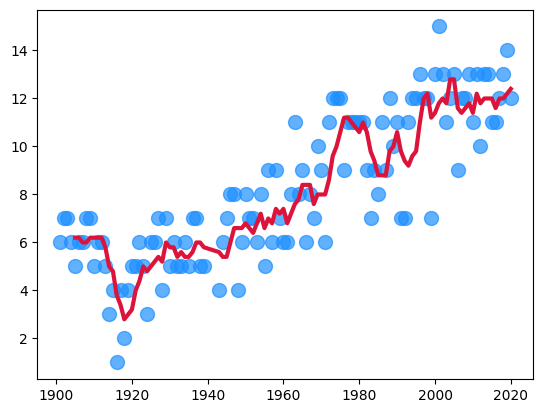

In [18]:
plt.scatter(x=prize_per_year.index, y=prize_per_year.values,c='dodgerblue',alpha=0.7,s=100 )
plt.plot(prize_per_year.index, moving_avg.values, c='crimson', linewidth=3)
plt.show()

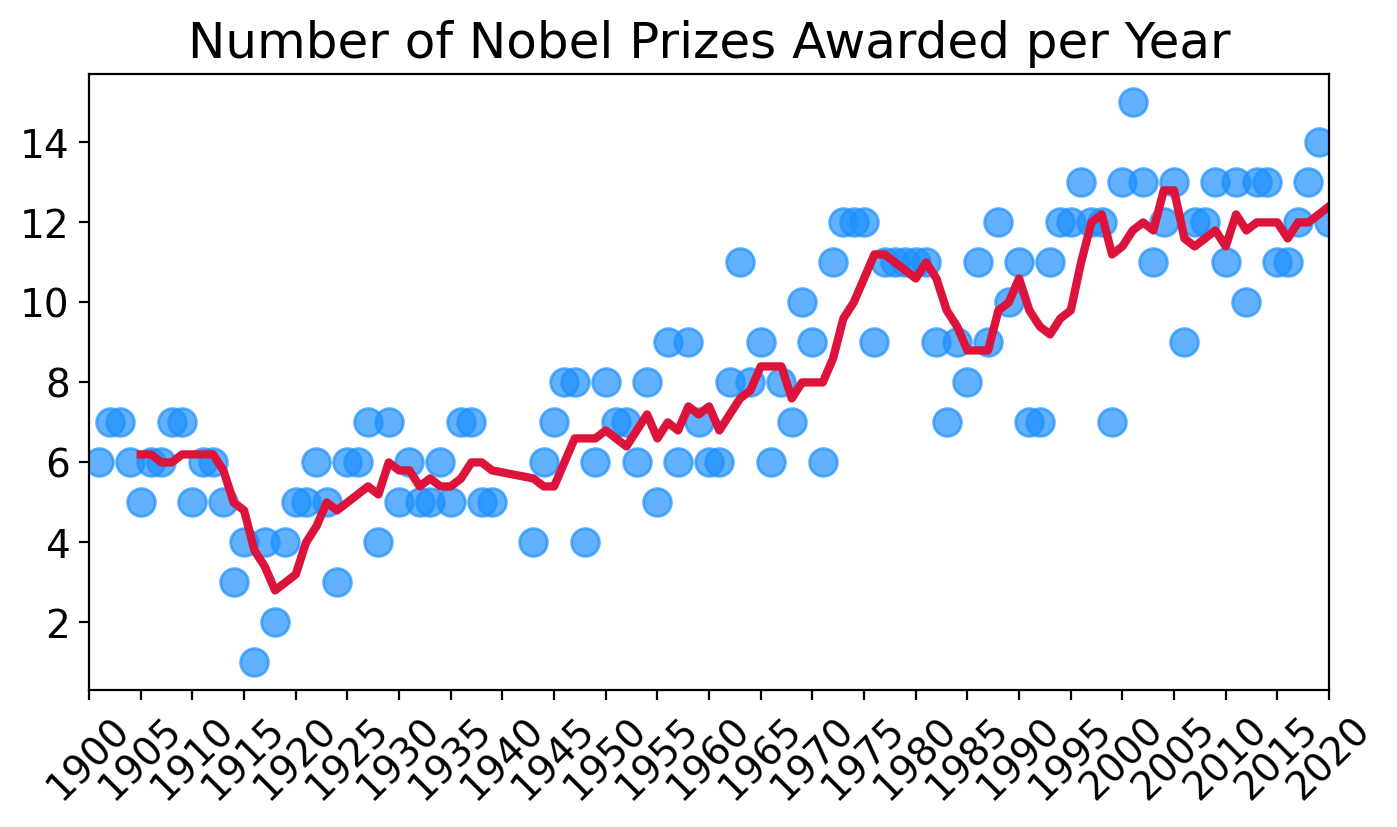

In [19]:
plt.figure(figsize=(8,4), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_avg.values, 
        c='crimson', 
        linewidth=3)
 
plt.show()

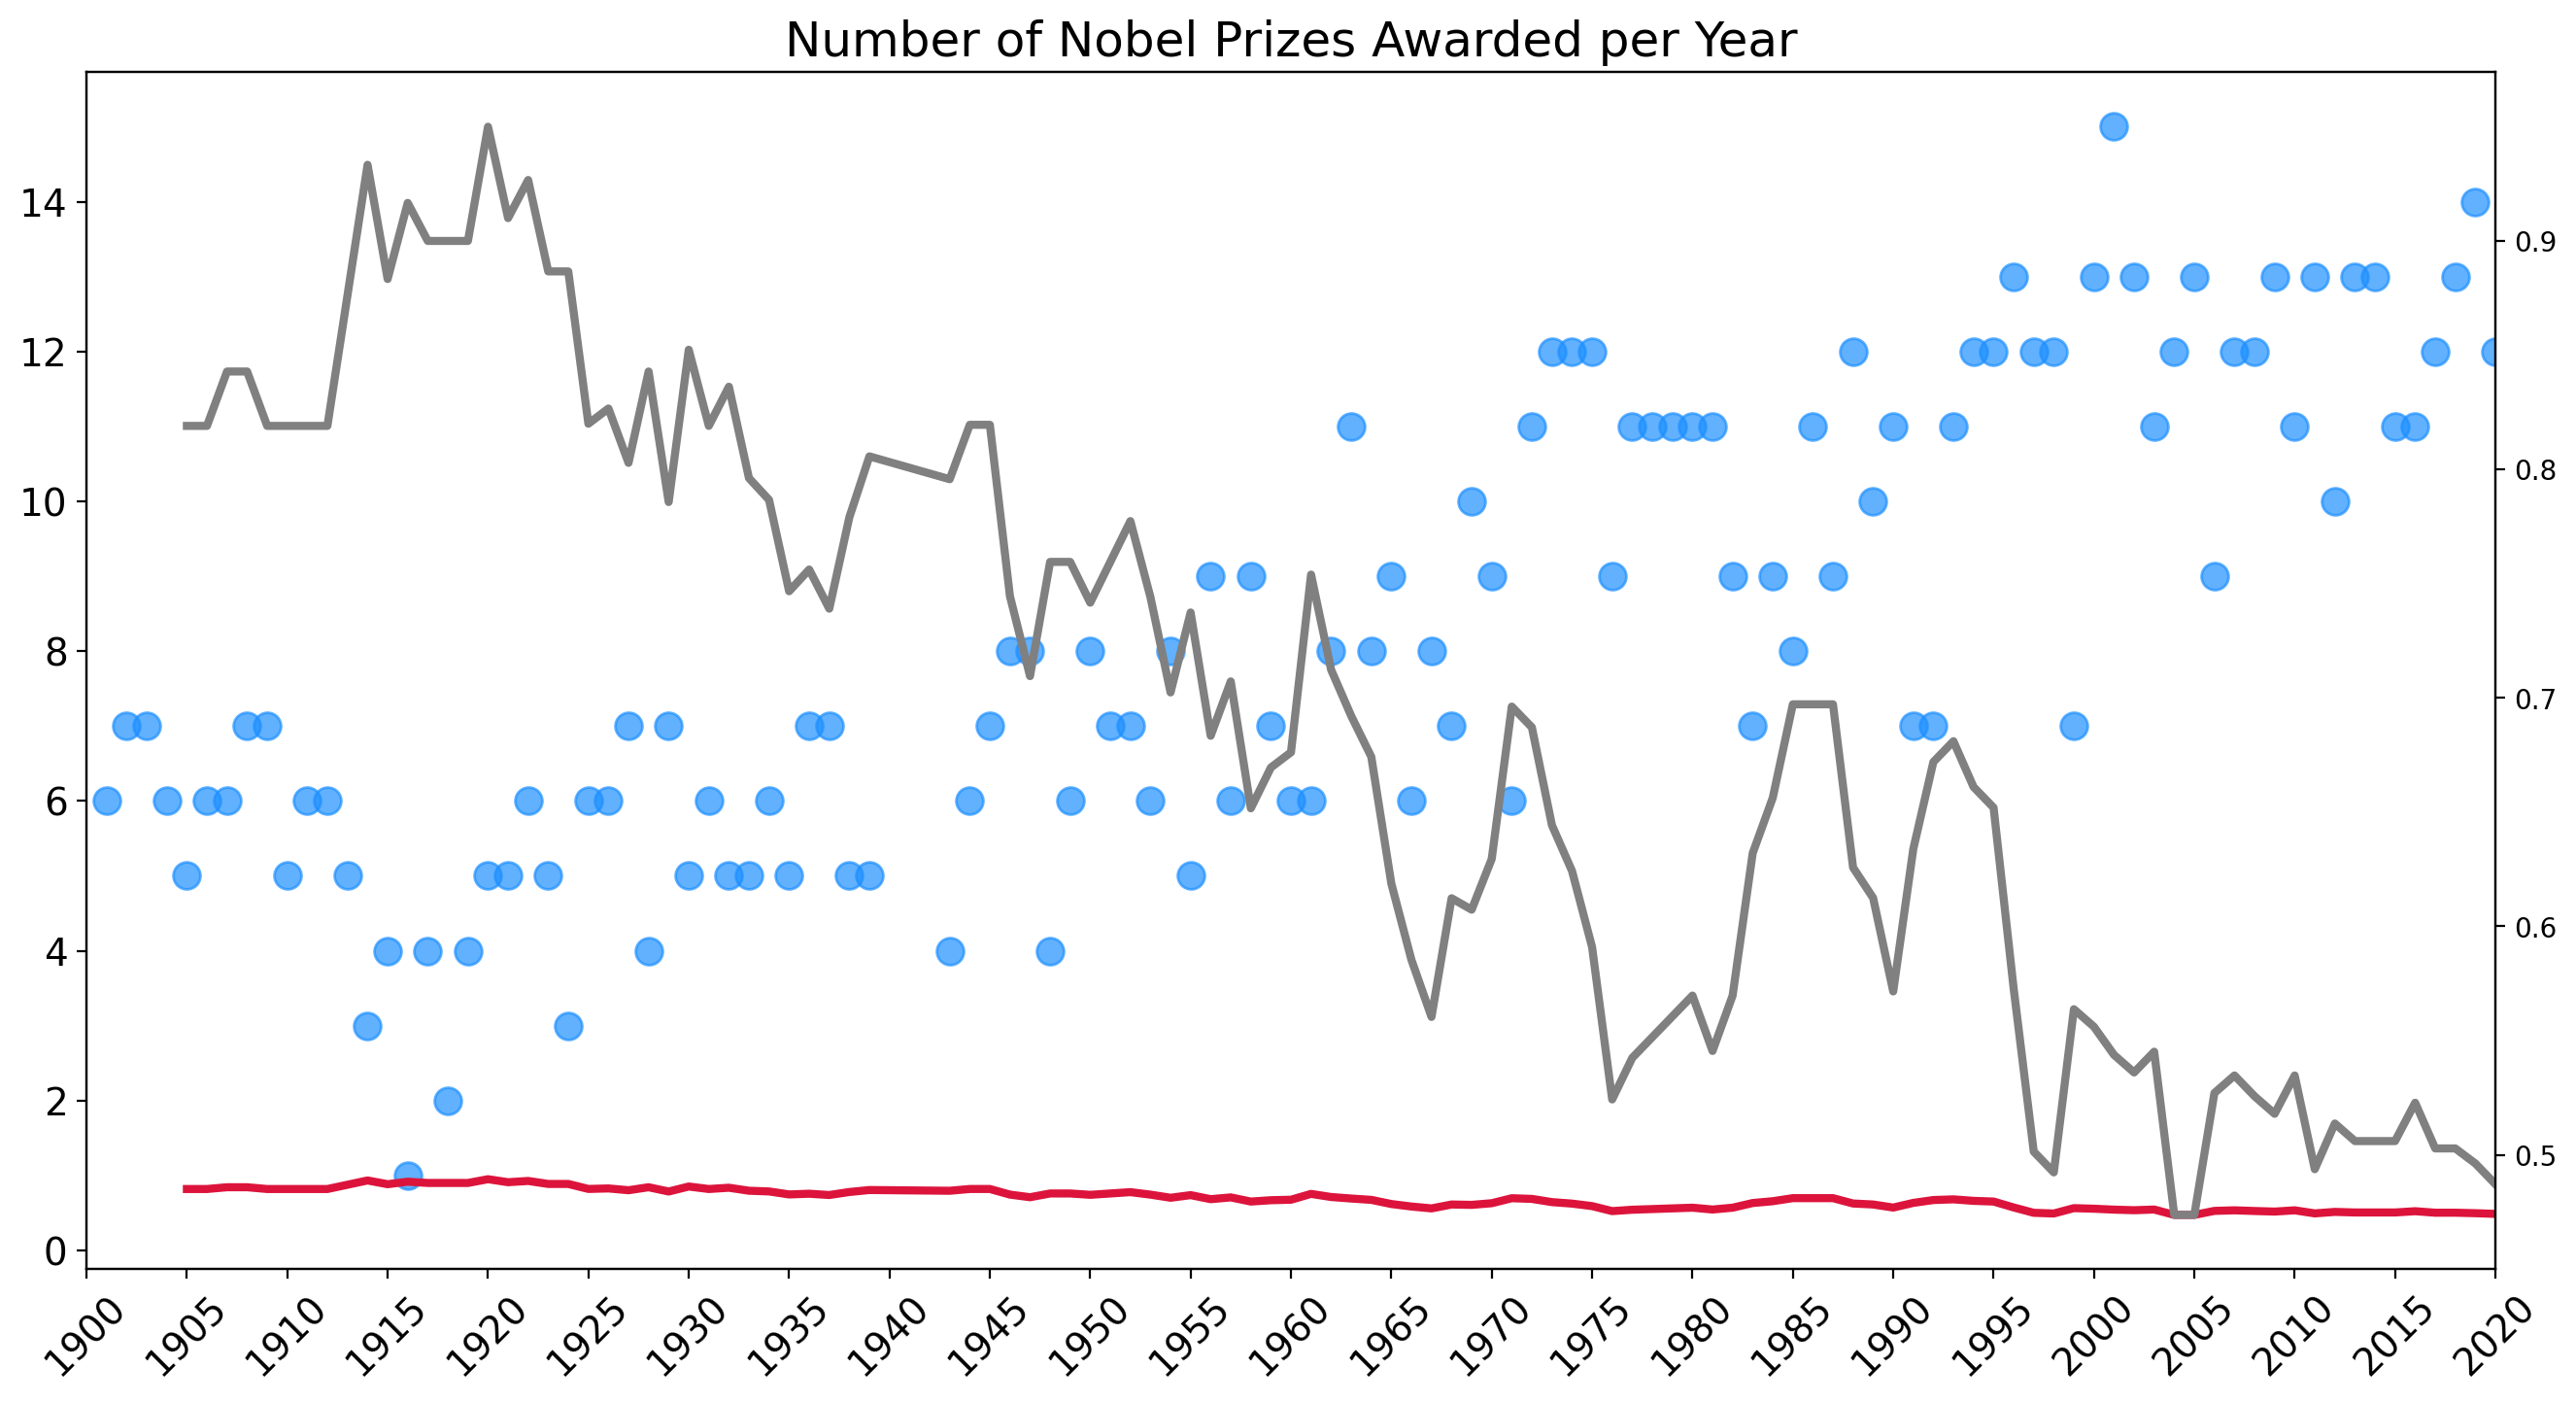

In [20]:
yearly_avg_share = df.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

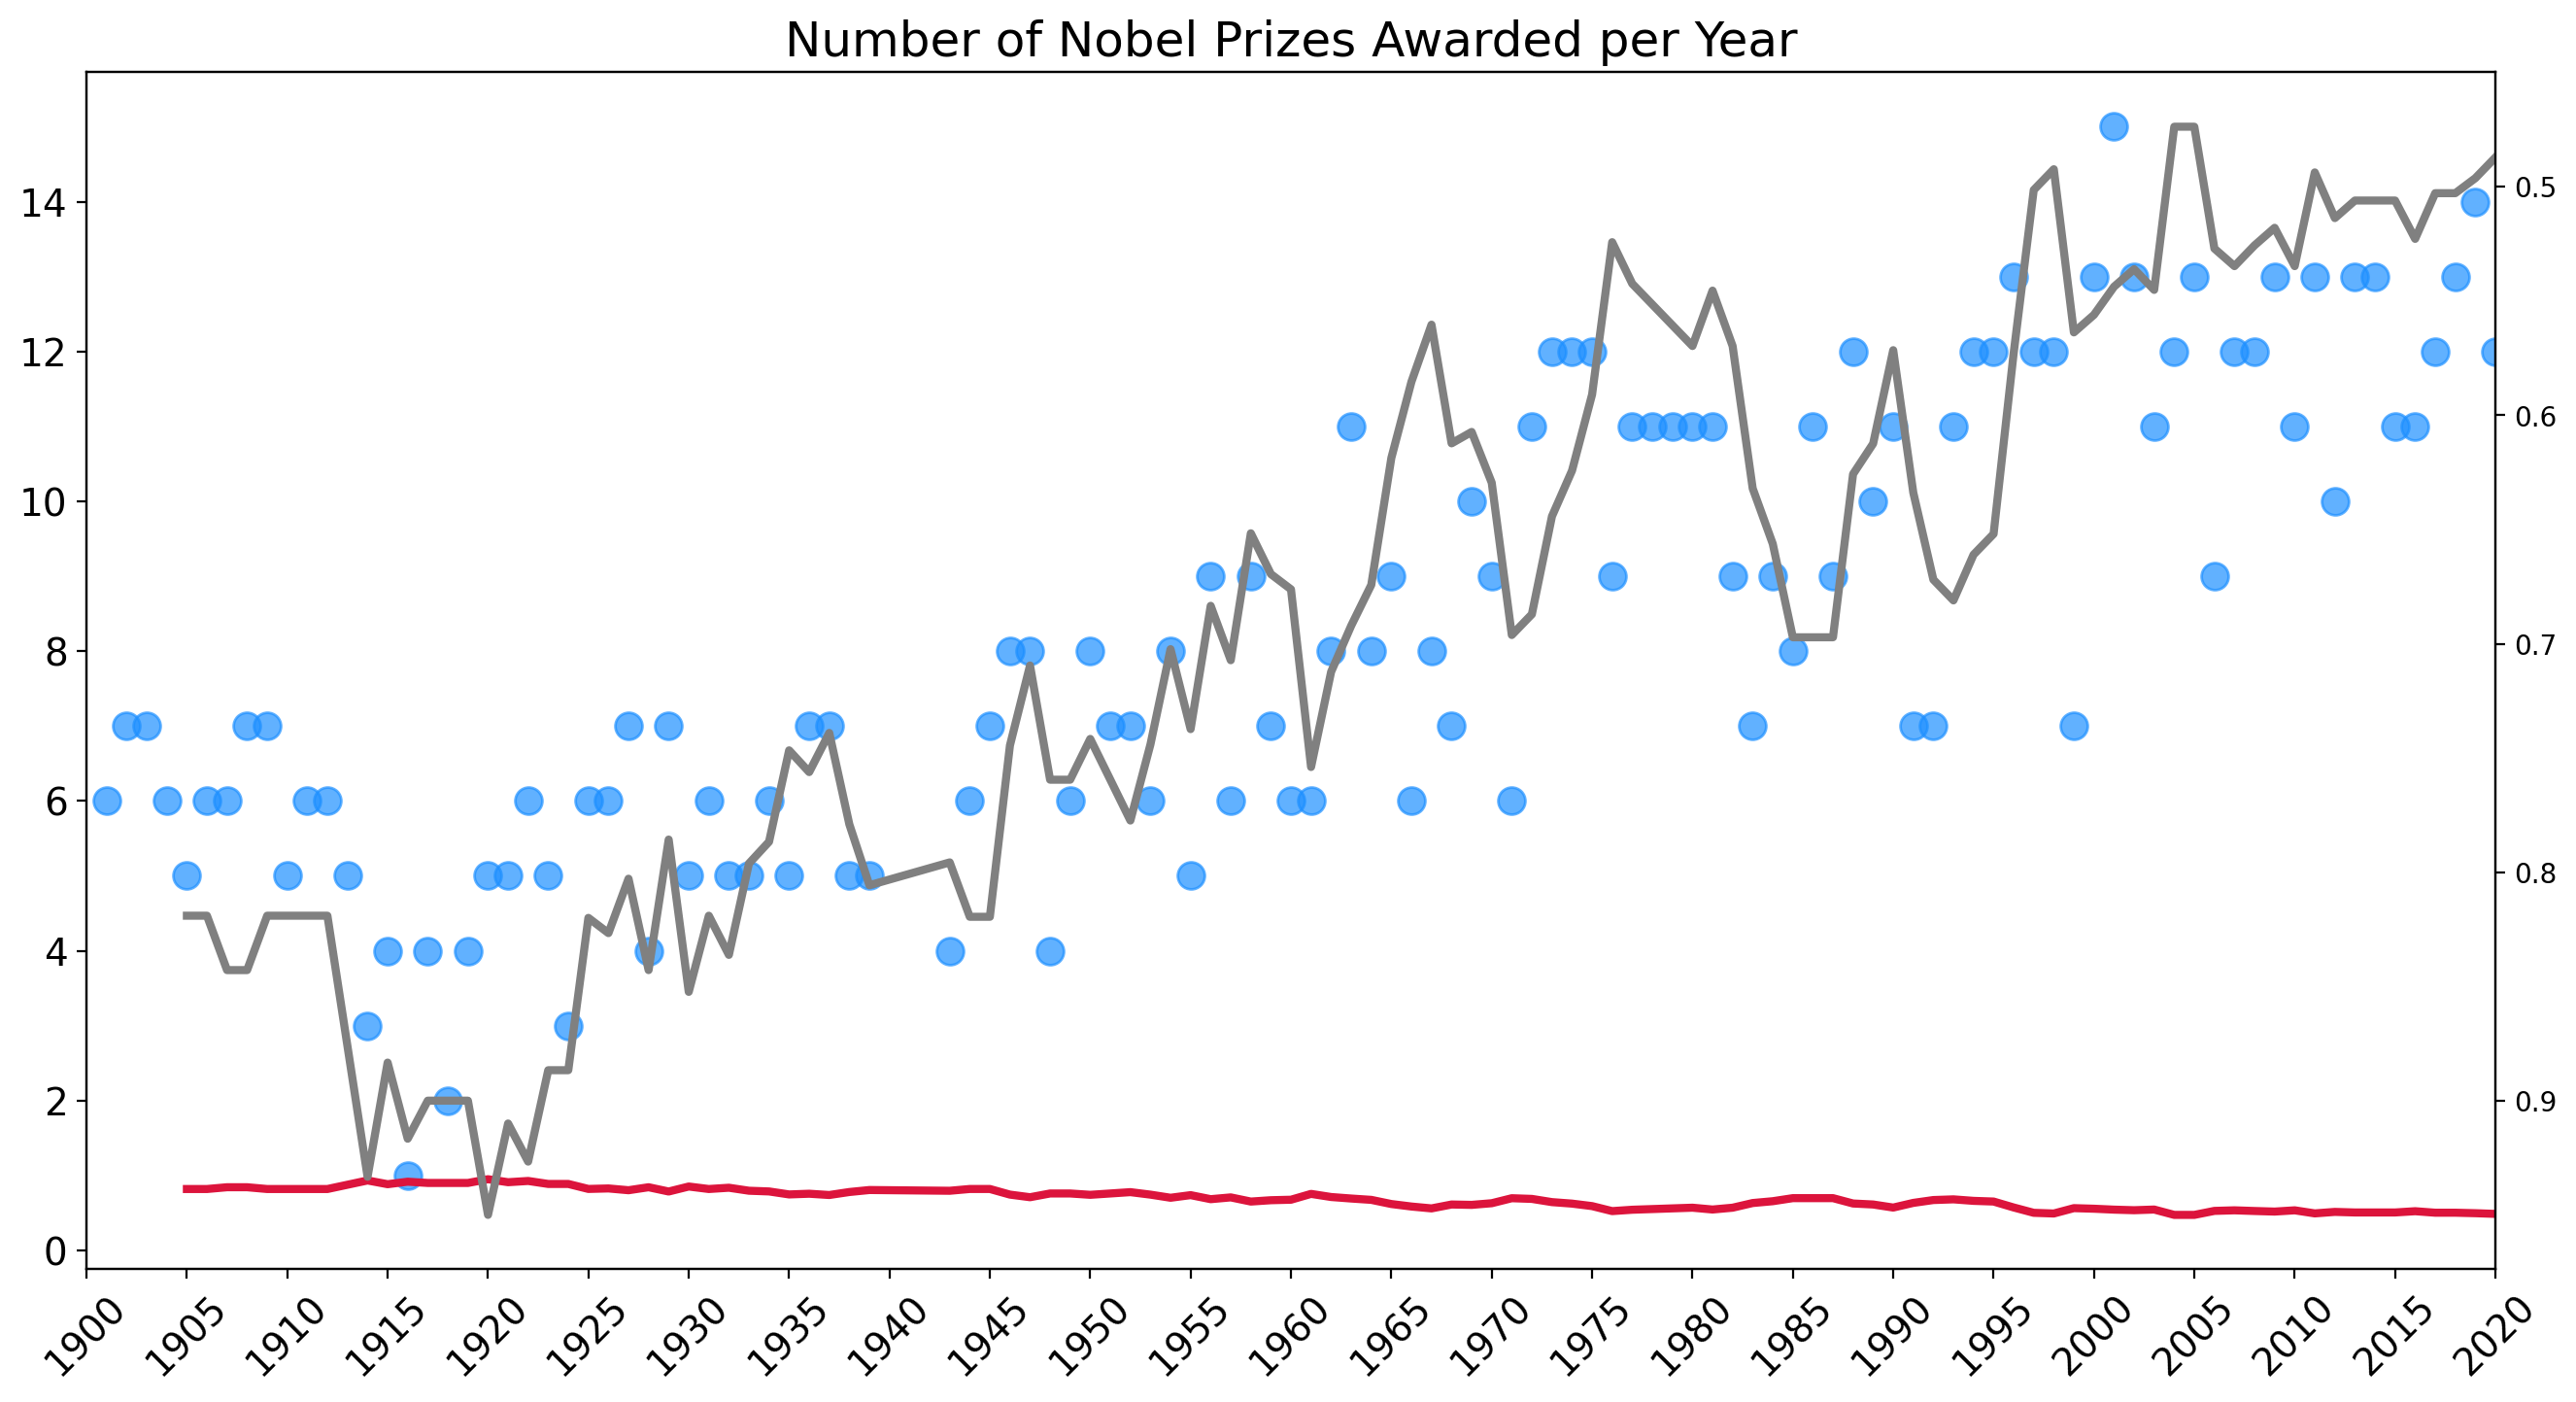

In [21]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
 
# Can invert axis
ax2.invert_yaxis()
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

In [22]:
top_countries = df.groupby(['birth_country_current'], 
                                  as_index=False).agg({'prize': pd.Series.count})
 
top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

In [23]:
df_countries = df.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

In [24]:
cat_country = df.groupby(['birth_country_current', 'category'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()

In [25]:
prize_by_year = df.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

In [51]:
top_20_org = df.organization_name.value_counts()[:20]
top_20_org.sort_values(ascending=True, inplace=True)
org_bar = px.bar(x=top_20_org.values, y=top_20_org.index, orientation='h', color=top_20_org.values, title='Top 20 Research Institutions by Number of Prizes', color_continuous_scale=px.colors.sequential.haline)
org_bar.update_layout(xaxis_title='Number Of Prizes', yaxis=dict(title='Institution', tickmode='linear'), coloraxis_showscale=False)
org_bar.show()

In [50]:
top_20_cit = df.organization_city.value_counts()[:20]
top_20_cit.sort_values(ascending=True, inplace=True)
cit_bar = px.bar(x=top_20_cit.values, y=top_20_cit.index, orientation='h', color=top_20_cit.values, title='Top 20 City by Number of Prizes', color_continuous_scale=px.colors.sequential.Plasma)
cit_bar.update_layout(xaxis_title='Number Of Prizes', coloraxis_showscale=False, yaxis=dict(title='City', tickmode='linear'))
cit_bar.show()

In [57]:
top_20_bcc = df.birth_city.value_counts()[:20]
top_20_bcc.sort_values(ascending=True, inplace=True)
bcc_bar = px.bar(x=top_20_bcc.values, y=top_20_bcc.index, orientation='h', color=top_20_bcc.values, title='Top 20 City by Nobel Laureates Born', color_continuous_scale=px.colors.sequential.Plasma)
bcc_bar.update_layout(xaxis_title='Number Of Prizes', coloraxis_showscale=False, yaxis=dict(title='Birth City', tickmode='linear'))
bcc_bar.show()

In [71]:
country_city_org = df.groupby(["organization_country", "organization_city", "organization_name"], as_index=False).agg({'prize':pd.Series.count})
country_city_org = country_city_org.sort_values("prize",ascending=False)
sb = px.sunburst(country_city_org, path=['organization_country', 'organization_city','organization_name'], values='prize', title="Where Do Discoveries Happen?")
sb.update_layout(xaxis_title="Number Of Prizes", yaxis_title="City", coloraxis_showscale=False)
sb.show()

In [86]:
birth_year = pd.DatetimeIndex(df.birth_date).year
df["winning_age"] = df.year - birth_year
df.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.0,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.0,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.0,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.5,79.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.5,73.0


In [90]:
display(df.nlargest(n=1, columns='winning_age'))
display(df.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.333333,97.0


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.5,17.0


In [91]:
df.winning_age.describe()

count    934.000000
mean      59.948608
std       12.617785
min       17.000000
25%       51.000000
50%       60.000000
75%       69.000000
max       97.000000
Name: winning_age, dtype: float64

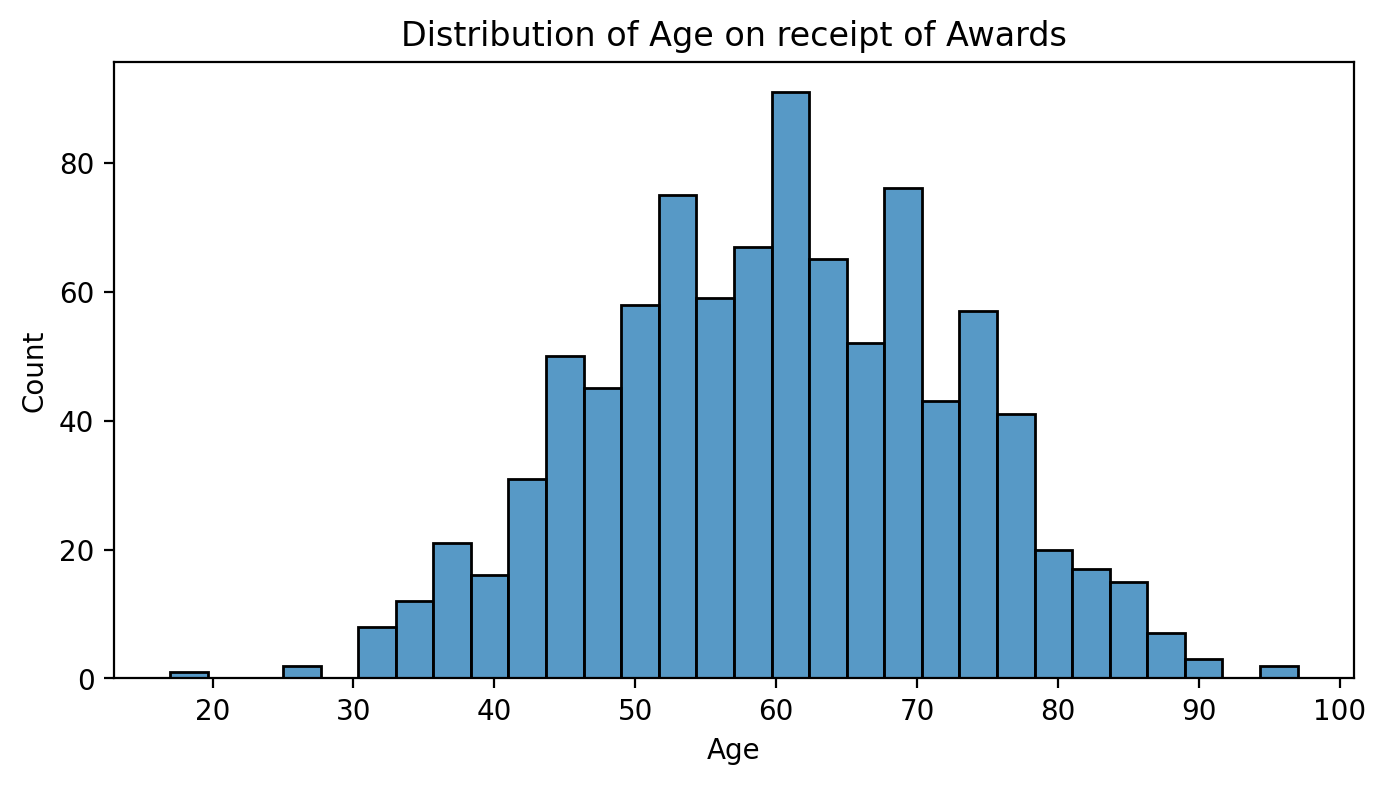

In [93]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df, x=df.winning_age, bins=30)
plt.xlabel("Age")
plt.title("Distribution of Age on receipt of Awards")
plt.show()

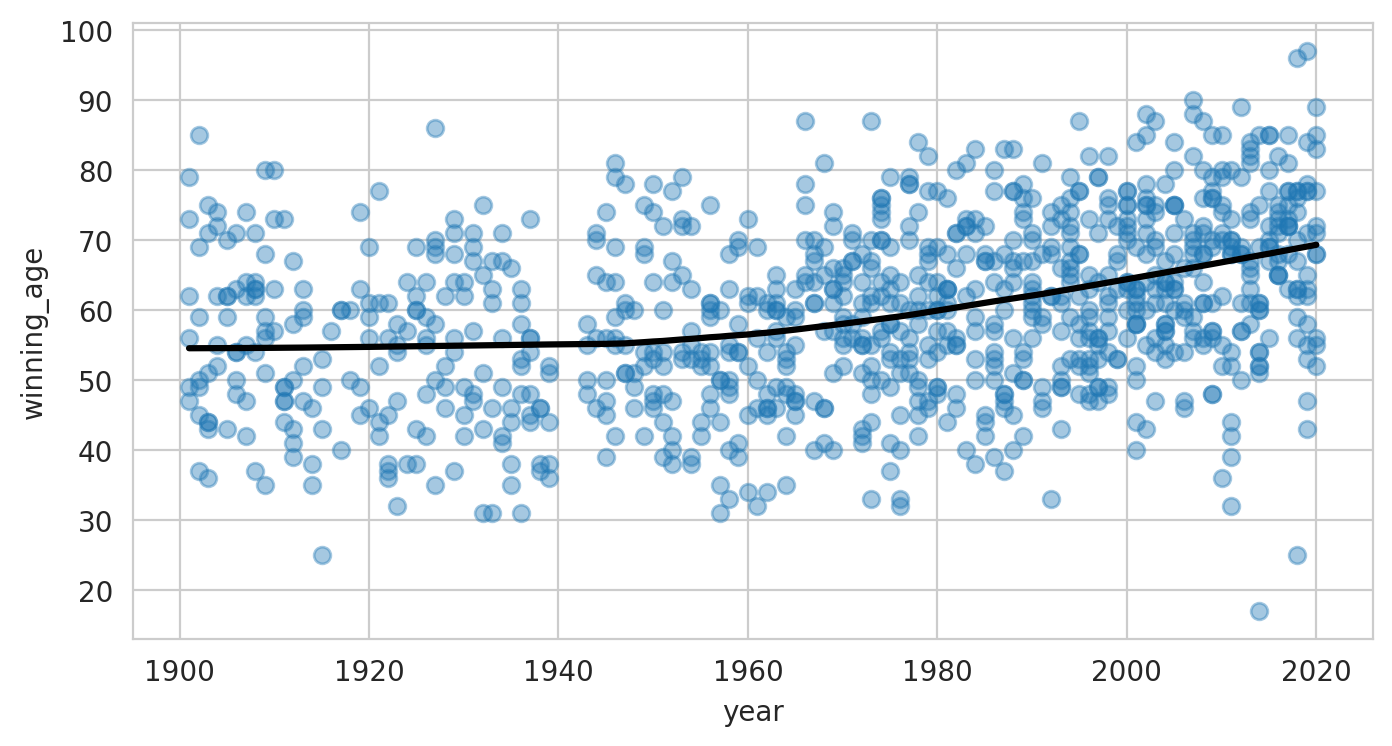

In [100]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

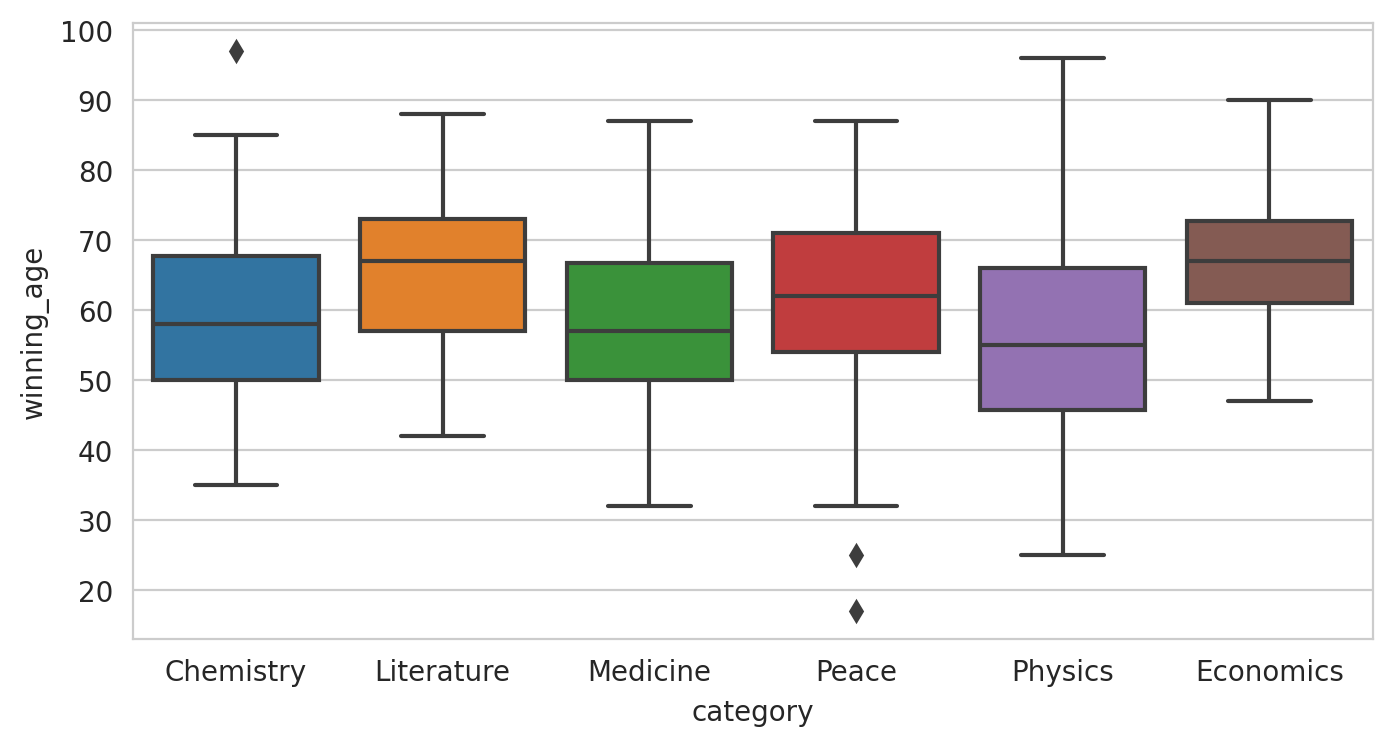

In [96]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df,
                x='category',
                y='winning_age')
 
plt.show()

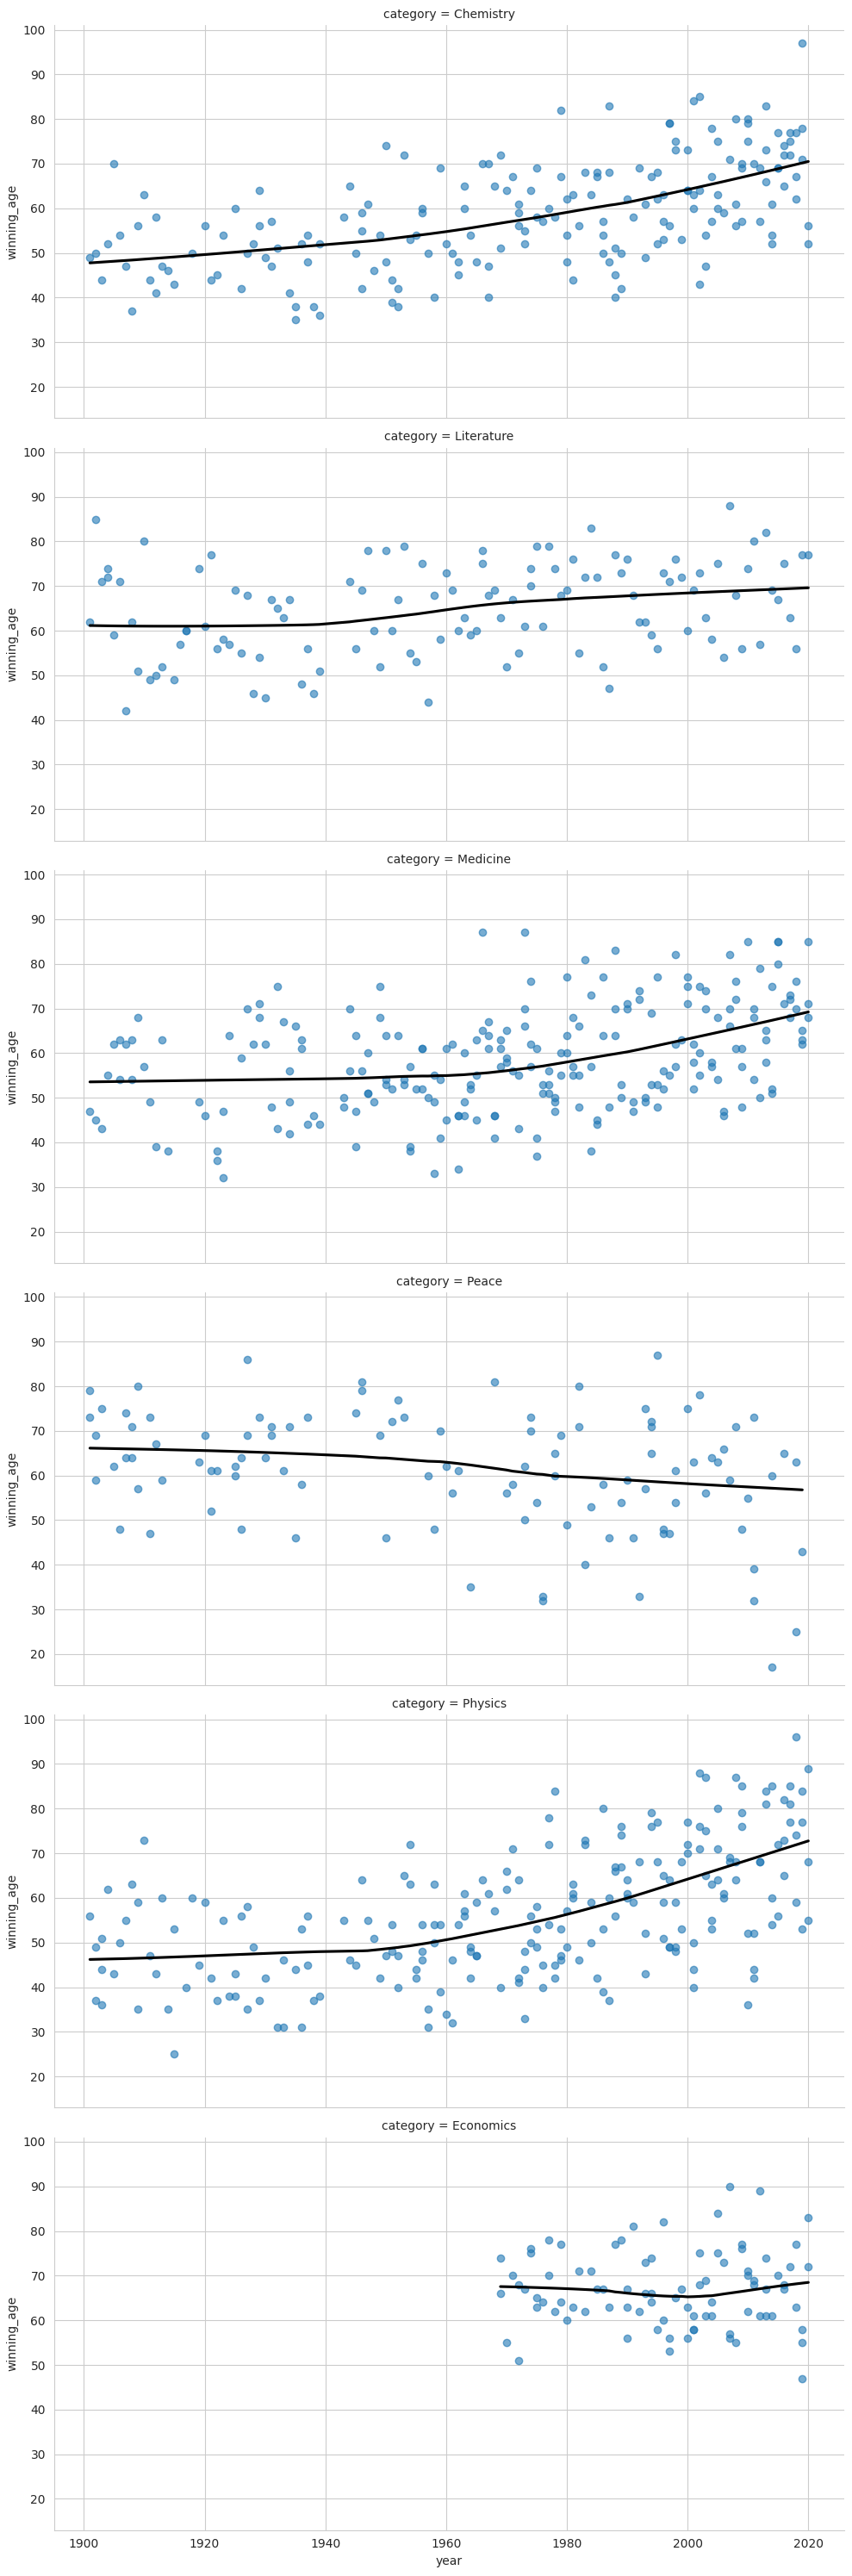

In [101]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

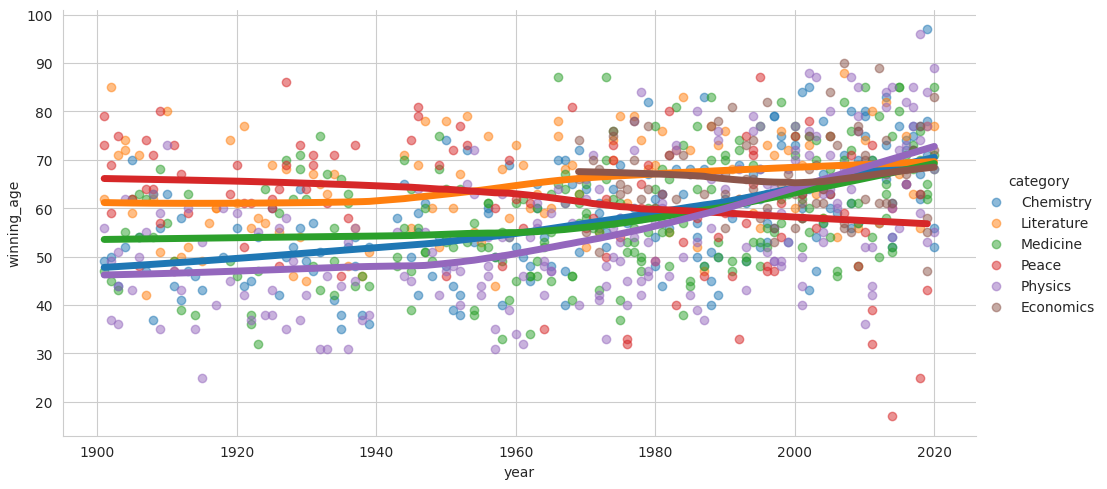

In [103]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()